# Jupyter Notbook for phoneme coverage analysis

This jupyter notebook checks dataset configured in config.json for phoneme coverage.
As mentioned here https://github.com/mozilla/TTS/wiki/Dataset#what-makes-a-good-dataset a good phoneme coverage is recommended.

Most parameters will be taken from config.json file in mozilla tts repo so please ensure it's configured correctly for your dataset.
This notebook used lots of existring code from the TTS repo to ensure future compatibility.

Many thanks to Neil Stoker supporting me on this topic :-).

I provide this notebook without any warrenty but it's hopefully useful for your dataset analysis.

Happy TTS'ing :-)

Thorsten Müller

* https://github.com/thorstenMueller/deep-learning-german-tts
* https://discourse.mozilla.org/t/contributing-my-german-voice-for-tts/

In [1]:
# set some vars
# TTS_PATH = "/home/thorsten/___dev/tts/mozilla/TTS"
CONFIG_FILE = "/home/iref/PycharmProjects/tts-vc/models_and_weights/tacotron_config.json"
CHARS_TO_REMOVE = ".,:!?'"
TTS_PATH = "/home/iref/PycharmProjects/tts-vc/"

In [2]:
# import stuff
import sys
sys.path.append(TTS_PATH) # set this if TTS is not installed globally
from mozilla_TTS_utils.io import load_config
from mozilla_TTS_utils.preprocess import load_meta_data
from mozilla_TTS_utils.text import phoneme_to_sequence, sequence_to_phoneme
from tqdm import tqdm
from matplotlib import pylab as plt
from multiprocessing import Pool, cpu_count

# extra imports that might not be included in requirements.txt
import collections
import operator



In [3]:
# Load config.json properties
CONFIG = load_config(CONFIG_FILE)

# Load some properties from config.json
CONFIG_METADATA = sorted(load_meta_data(CONFIG.datasets)[0])
CONFIG_METADATA = CONFIG_METADATA
CONFIG_DATASET = CONFIG.datasets[0]
CONFIG_PHONEME_LANGUAGE = CONFIG.phoneme_language
CONFIG_TEXT_CLEANER = CONFIG.text_cleaner
CONFIG_ENABLE_EOS_BOS_CHARS = CONFIG.enable_eos_bos_chars

# Will be printed on generated output graph
CONFIG_RUN_NAME = CONFIG.run_name
CONFIG_RUN_DESC = CONFIG.run_description

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_1.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_2.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_3.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_4.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_5.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_6.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_7.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_8.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_9.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_10.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Andrienko_A/Andrienko_A_11.wav
/home/ir

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-01.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-02.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-03.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-04.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-05.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-06.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-07.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-08.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Podoruga_Alexander/Podoruga_Alexander-09.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_103.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_104.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_105.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_106.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_107.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_108.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_109.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_110.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_111.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_112.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_113.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Putin/putin_114.wav
/home/iref/PycharmProjects/tts-vc/data/s

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0431.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0432.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0433.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0434.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0435.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0436.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0437.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0439.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0440.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0441.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0442.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/ira/ira_ru_0443.wav
/home/iref/PycharmProjects/tts-vc/data/s

/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-01.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-02.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-03.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-04.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-05.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-06.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-07.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-08.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-09.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-10.wav
/home/iref/PycharmProjects/tts-vc/data/speaker_encoder_data/Kuzmina_S/Kuzmina_S-11.wav
/home/iref/PycharmProjects/tts-vc/data/spea

In [4]:
# print some debug information on loaded config values
print(" > Run name: " + CONFIG_RUN_NAME + " (" + CONFIG_RUN_DESC + ")")
print(" > Dataset files: " + str(len(CONFIG_METADATA)))
print(" > Phoneme language: " + CONFIG_PHONEME_LANGUAGE)
print(" > Used text cleaner: " + CONFIG_TEXT_CLEANER)
print(" > Enable eos bos chars: " + str(CONFIG_ENABLE_EOS_BOS_CHARS))

 > Run name: train_launch_1 (tacotron2 with DDC and differential spectral loss.)
 > Dataset files: 25030
 > Phoneme language: ru
 > Used text cleaner: basic_cleaners
 > Enable eos bos chars: False


In [27]:
def get_phoneme_from_sequence(text):
    temp_list = []
    if len(text[0]) > 0:
        temp_text = text[0].rstrip('\n')
        for rm_bad_chars in CHARS_TO_REMOVE:
            temp_text = temp_text.replace(rm_bad_chars,"")
        #print(temp_text)
        seq = phoneme_to_sequence(temp_text, [CONFIG_TEXT_CLEANER], CONFIG_PHONEME_LANGUAGE, CONFIG_ENABLE_EOS_BOS_CHARS)
        #print(seq)
        text = sequence_to_phoneme(seq)
        text = text.replace(" ","")
        temp_list.append(text)
    #print(temp_list)
    return temp_list

In [28]:
# Get phonemes from metadata
phonemes = []

with Pool(cpu_count()-1) as p:
    
    phonemes = list(tqdm(p.imap(get_phoneme_from_sequence, CONFIG_METADATA), total=len(CONFIG_METADATA)))
    phonemes = [i for sub in phonemes for i in sub]

  2%|▏         | 376/25030 [00:14<14:51, 27.65it/s][WARNING] 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
[WARNING] 1 utterances containing language switches on lines 1
[WARNING] 1 utterances containing language switches on lines 1
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
  2%|▏         | 379/25030 [00:14<15:34, 26.39it/s][WARNING] 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] 1 utterances containing language switches on lines 1
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
[WARNING] extra phones may appe

 56%|█████▌    | 13954/25030 [10:06<08:11, 22.54it/s][WARNING] 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
[WARNING] 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
[WARNING] 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
[WARNING] 1 utterances containing language switches on lines 1
 56%|█████▌    | 13957/25030 [10:07<08:42, 21.20it/s][WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)
100%|██████████| 25030/25030 [18:29<00:00, 22.56it/s]


In [14]:
for num in [375, 378, 381, 384, 489, 492, 695, 698]:
    print(CONFIG_METADATA[num][0])

А теперь слово имеет представитель Соединенного Королевства Великобритании и Северной Ирландии.,,,,,,
А теперь слово имеет следующий оратор у меня в списке − посол Австралии.,,,,,,
А теперь слово имеет следующий оратор − представитель Кубы.,,,,,,
А теперь слово имеет следующий оратор − представитель Пакистана.,,,,,
А это − безотрадная перспектива.,,,,,,
А это − безотрадная перспектива.,,,,,,,
Безопасность и стабильность на Ближнем Востоке не будут достигнуты, пока Израиль обладает ядерным оружием.,,,
Безусловный приоритет России на Конференции по разоружению − предотвращение гонки вооружений в космосе.,,,,,,


In [24]:
get_phoneme_from_sequence(CONFIG_METADATA[489])

А это − безотрадная перспектива


[WARNING] 1 utterances containing language switches on lines 1
[WARNING] extra phones may appear in the "ru" phoneset
[WARNING] language switch flags have been removed (applying "remove-flags" policy)


[40, 128, 50, 21, 91, 128, 14, 3, 63, 15, 48, 20, 128, 4, 10, 27, 91, 21, 19, 40, 6, 15, 91, 11, 3, 128, 17, 10, 19, 20, 17, 10, 12, 21, 10, 23, 3, 128]
['ɑɛtʌmaɪnəsbizʌtrɑdnʌjapirspiktiva']


['ɑɛtʌmaɪnəsbizʌtrɑdnʌjapirspiktiva']

In [25]:
s = ""
phonemeString = s.join(phonemes)

d = {}
collections._count_elements(d, phonemeString)
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))

# remove useless keys
sorted_d.pop(' ', None)
sorted_d.pop('ˈ', None)

phonemesSum = len(phonemeString.replace(" ",""))

print("Dataset contains " + str(len(sorted_d)) + " different ipa phonemes.")
print("Dataset consists of " + str(phonemesSum) + " phonemes")

Dataset contains 0 different ipa phonemes.
Dataset consists of 0 phonemes


In [8]:
print("5 rarest phonemes")

rareList = dict(sorted(sorted_d.items(), key=operator.itemgetter(1), reverse=False)[:5])
for key, value in rareList.items():
    print(key + " --> " + str(value) + " occurrences")

5 rarest phonemes
ŋ --> 2 occurrences
ɔ --> 3 occurrences
; --> 6 occurrences
ɵ --> 1495 occurrences
ʑ --> 2883 occurrences


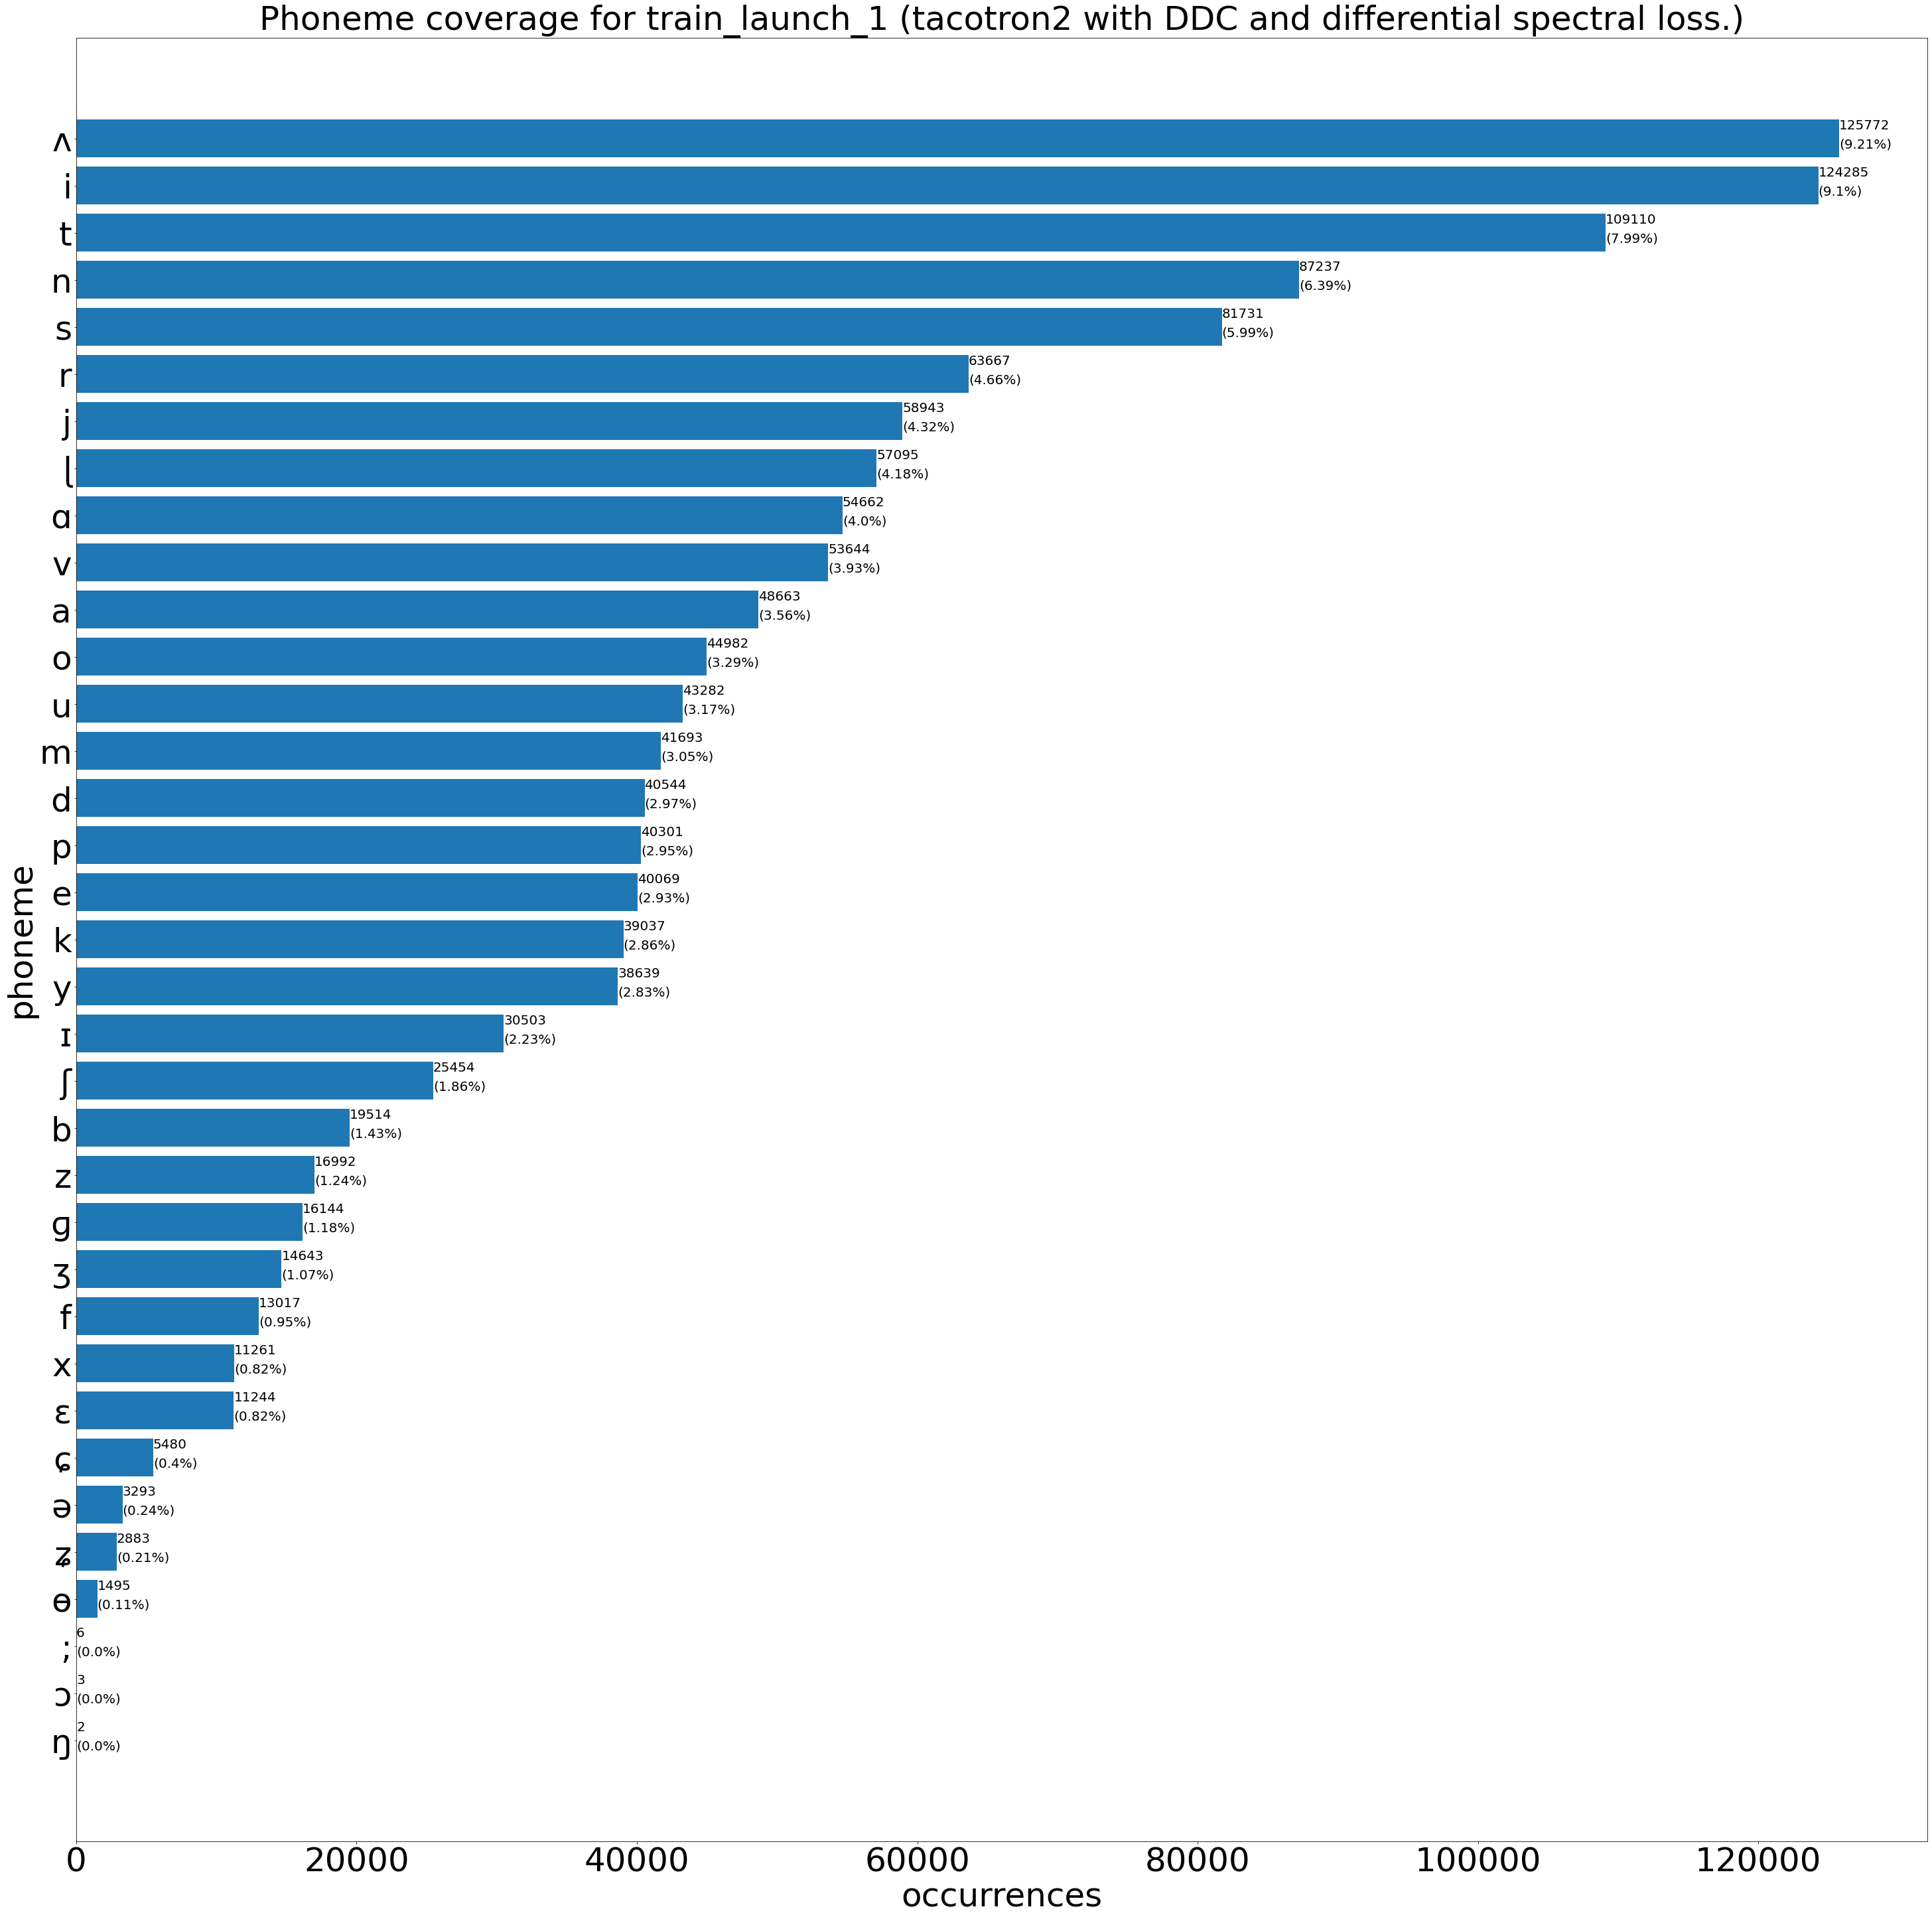

In [9]:
# create plot from analysis result

x = []
y = []

for key, value in sorted_d.items():
    x.append(key)
    y.append(value)

plt.figure(figsize=(50,50))
plt.title("Phoneme coverage for " + CONFIG_RUN_NAME + " (" + CONFIG_RUN_DESC + ")", fontsize=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.barh(x,y, align='center', alpha=1.0)
plt.gca().invert_yaxis()
plt.ylabel('phoneme', fontsize=50)
plt.xlabel('occurrences', fontsize=50)

for i, v in enumerate(y):
    plt.text(v + 2, i - .2, str(v), fontsize=20)
    plt.text(v + 2, i + .2, "(" + str(round(100/phonemesSum * v,2)) + "%)", fontsize=20)
    
    
plt.show()